In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
# %matplotlib inline
import datetime
import os
import seaborn as sns#数据可视化
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import pickle #用于存储模型
from sklearn.metrics import *
from sklearn.model_selection import *

In [2]:
data150k = pd.read_csv("winemag-data_first150k.csv")
data130k = pd.read_csv("winemag-data-130k-v2.csv")
print(data150k[2:])
print(data130k[2:])

        Unnamed: 0 country                                        description  \
2                2      US  Mac Watson honors the memory of a wine once ma...   
3                3      US  This spent 20 months in 30% new French oak, an...   
4                4  France  This is the top wine from La Bégude, named aft...   
5                5   Spain  Deep, dense and pure from the opening bell, th...   
6                6   Spain  Slightly gritty black-fruit aromas include a s...   
...            ...     ...                                                ...   
150925      150925   Italy  Many people feel Fiano represents southern Ita...   
150926      150926  France  Offers an intriguing nose with ginger, lime an...   
150927      150927   Italy  This classic example comes from a cru vineyard...   
150928      150928  France  A perfect salmon shade, with scents of peaches...   
150929      150929   Italy  More Pinot Grigios should taste like this. A r...   

                          d

In [3]:
print('the columns name of 150k dataset:\n',data150k.columns)
print('the columns name of 130k dataset:\n',data130k.columns)

the columns name of 150k dataset:
 Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
the columns name of 130k dataset:
 Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [4]:
print(data130k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
print(data150k.info())
data150k.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
None


Unnamed: 0         points          price
count  150930.000000  150930.000000  137235.000000
mean    75464.500000      87.888418      33.131482
std     43569.882402       3.222392      36.322536
min         0.000000      80.000000       4.000000
25%     37732.250000      86.000000      16.000000
50%     75464.500000      88.000000      24.000000
75%    113196.750000      90.000000      40.000000
max    150929.000000     100.000000    2300.000000

In [6]:
print(data130k['price'].describe())
print(data130k['points'].describe())
print(data150k['price'].describe())
print(data150k['points'].describe())

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64
count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64
count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64
count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

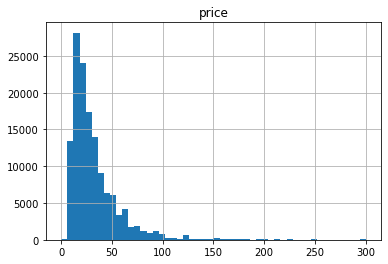

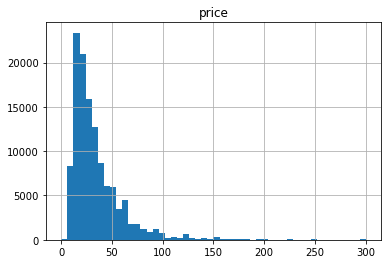

In [7]:
data150k.hist(column='price',range = (0,300),bins=50)
data130k.hist(column='price',range = (0,300),bins=50)

array([[<AxesSubplot:title={'center':'points'}>]], dtype=object)

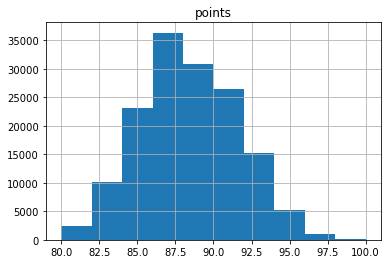

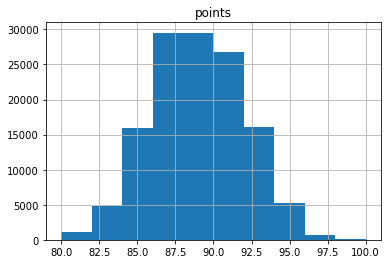

In [8]:
data150k.hist(column='points')
data130k.hist(column='points')

<AxesSubplot:title={'center':'points of 150k'}>

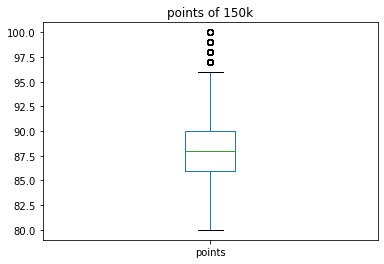

In [11]:
data150k['points'].plot.box(title = 'points of 150k')

<AxesSubplot:title={'center':'price of 150k'}>

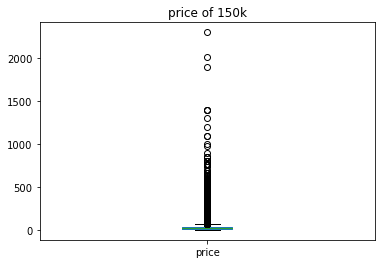

In [12]:
data150k['price'].plot.box(title = 'price of 150k')

<AxesSubplot:title={'center':'points of 130k'}>

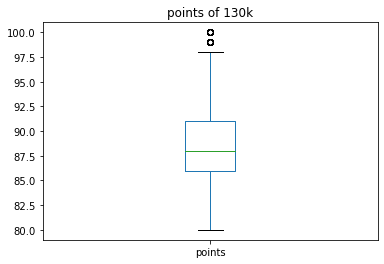

In [15]:
data130k['points'].plot.box(title = 'points of 130k')

<AxesSubplot:title={'center':'price of 130k'}>

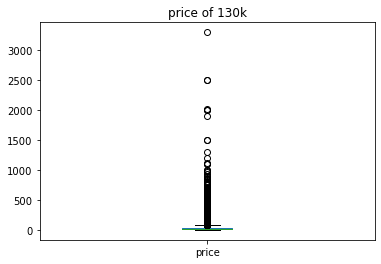

In [16]:
data130k['price'].plot.box(title = 'price of 130k')

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64


<AxesSubplot:title={'center':'price of 130k after dropping'}>

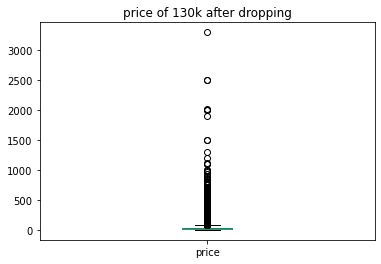

In [34]:
#直接去除缺失值
datacut = data130k['price']
datacut.dropna(axis=0,inplace=True)
print(datacut.describe())
datacut.plot.box(title = 'price of 130k after dropping')

count    129971.000000
mean         34.300005
std          39.768715
min           4.000000
25%          18.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


<AxesSubplot:title={'center':'price of 130k by modeimputer'}>

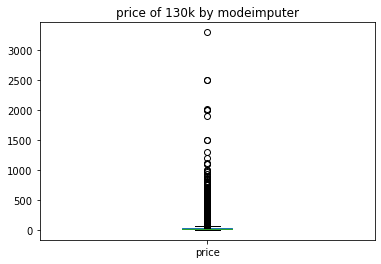

In [17]:
#使用众数填充缺失值
datacut = data130k['price']
datacut=datacut.fillna(datacut.mode()[0])
print(datacut.describe())
datacut.plot.box(title = 'price of 130k by modeimputer')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


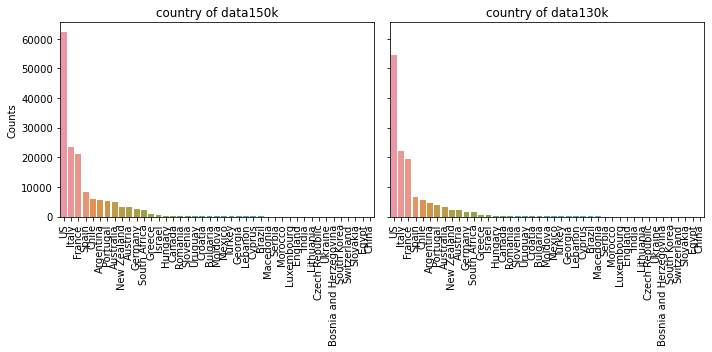

In [9]:
def feature_barplot(feature, df_train, df_test, figsize=(10,5), rot = 90, saveimg = False): 
    feat_train = df_train[feature].value_counts()
    feat_test = df_test[feature].value_counts()
    fig_feature, (axis1,axis2) = plt.subplots(1,2,sharex=True, sharey = True, figsize = figsize)
    sns.barplot(feat_train.index.values, feat_train.values, ax = axis1)
    sns.barplot(feat_test.index.values, feat_test.values, ax = axis2)
    axis1.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis2.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis1.set_title(feature + ' of data150k')
    axis2.set_title(feature + ' of data130k')
    axis1.set_ylabel('Counts')
    plt.tight_layout()
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)

feature_barplot('country',data150k,data130k, saveimg = False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


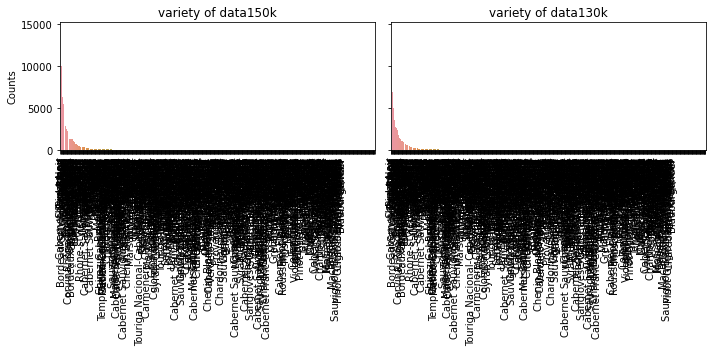

In [10]:
feature_barplot('variety',data150k,data130k, saveimg = False)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
pf = pd.get_dummies(data150k[['country']])
data150k = pd.concat([data150k, pf], axis=1)
data150k.drop(['country'], axis=1, inplace=True)
print(data150k)

In [14]:
df = pd.concat([data150k[['price']], data150k[['points']]], axis=1)

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

        price  points
0       235.0    96.0
1       110.0    96.0
2        90.0    96.0
3        65.0    96.0
4        66.0    95.0
...       ...     ...
150925   20.0    91.0
150926   27.0    91.0
150927   20.0    91.0
150928   52.0    90.0
150929   15.0    90.0

[150930 rows x 2 columns]


count    150930.000000
mean         32.997403
std          35.153628
min           4.000000
25%          16.000000
50%          24.666667
75%          40.000000
max        2300.000000
Name: price, dtype: float64

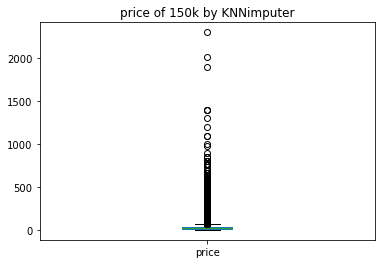

In [29]:
print(df_imputed)
df_imputed.price.plot.box(title = 'price of 150k by KNNimputer')
df_imputed.price.describe()

        price  points
0        14.0    87.0
1        15.0    87.0
2        14.0    87.0
3        13.0    87.0
4        65.0    87.0
...       ...     ...
129966   28.0    90.0
129967   75.0    90.0
129968   30.0    90.0
129969   32.0    90.0
129970   21.0    90.0

[129971 rows x 2 columns]


count    129971.000000
mean         35.542234
std          41.119650
min           4.000000
25%          17.000000
50%          26.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

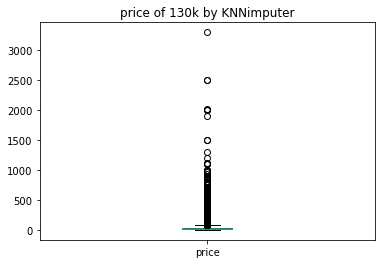

In [36]:
df2 = pd.concat([data130k[['price']], data130k[['points']]], axis=1)
from sklearn.impute import KNNImputer
imputer2 = KNNImputer(n_neighbors=3)
imputed2 = imputer2.fit_transform(df2)
df_imputed2 = pd.DataFrame(imputed2, columns=df2.columns)
print(df_imputed2)
df_imputed2.price.plot.box(title = 'price of 130k by KNNimputer')
df_imputed2.price.describe()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

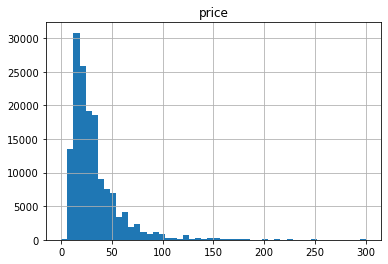

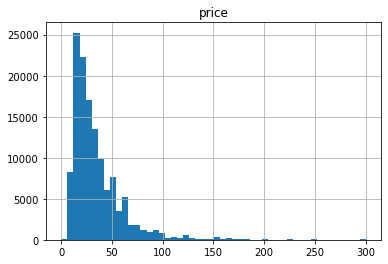

In [37]:
df_imputed.hist(column='price',range = (0,300),bins=50)
df_imputed2.hist(column='price',range = (0,300),bins=50)